In [146]:
# calculate annual total fossil fuel emission for 
# ODIAC and EDGAR5
# and compare

In [147]:
%matplotlib inline
%config InlineBackend.figure_format = "retina"

from matplotlib import rcParams
rcParams["savefig.dpi"] = 300
rcParams["font.size"] = 12

import warnings
warnings.filterwarnings('ignore')

In [148]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
from util.functions import area_latlon
from util.gamap_colormap import WhGrYlRd

In [149]:
# EDGAR
input_dir = '/home/msadiq/Desktop/co2/emissions/'
year_vec = [2016,2017,2018]
lat_res = 0.1
lon_res = 0.1
varname = 'emi_co2'
fname1 = 'EDGAR/nc/v50_CO2_excl_short-cycle_org_C_'
fname2 = '.0.1x0.1.nc'
output_edgar = np.zeros(3)

In [150]:
tmp = xr.open_dataset(input_dir+'EDGAR/nc/v50_CO2_excl_short-cycle_org_C_2016.0.1x0.1.nc')
tmp['emi_co2'] #.attrs#['global_total'] #['intl_bunker'][:,:,1].plot()

<xarray.DataArray 'emi_co2' (lat: 1800, lon: 3600)>
[6480000 values with dtype=float32]
Coordinates:
  * lat      (lat) float32 -89.95 -89.85 -89.75 -89.65 ... 89.75 89.85 89.95
  * lon      (lon) float32 -179.95 -179.85 -179.75 ... 179.75 179.85 179.95
Attributes:
    standard_name:  tendency_of_atmosphere_mass_content_of_carbon_dioxide_due...
    long_name:      Emissions of CO2 - 
    units:          kg m-2 s-1
    cell_method:    time: mean (interval: 1 year, 366 days)
    total_emi_co2:     3.67531e+013 kg/year
    comment:         (see http://edgar.jrc.ec.europa.eu/methodology.php#12sou...

In [151]:
for i, iyear in enumerate(year_vec):
    ds_EDGAR = xr.open_dataset(input_dir + 
                               fname1 +
                               str(iyear) + 
                               fname2)
    data = ds_EDGAR[varname].copy()
    
    for ilat, lat in enumerate(data.lat):
        area_tmp = area_latlon(lat1 = lat, 
                               lon1 = data.lon[10].values, 
                               lat2 = lat + lat_res, 
                               lon2 = data.lon[10].values + lon_res)
        if(iyear == 2016):
            data[ilat,:] = data[ilat,:] * area_tmp *3600*24*366*1e6 # unit: kgCO2/yr
        else:
            data[ilat,:] = data[ilat,:] * area_tmp *3600*24*365*1e6 # unit: kgCO2/yr
    annual_edgar = data.copy()
    total_edgar = data.sum()   # kgCO2/year, same as data description
    ann_total = total_edgar.values                # kg/yr
    ann_total_C = total_edgar.values*1e-12*12/44  # GtC/yr
    
    print(str(iyear))
    print('annual total from EDGAR team:')
    print(data.attrs['total_emi_co2'])
    print('annual total from this calculation:')
    print(' ',ann_total)
    print(' ')
    #print('total ffCO2 emission (GtC/yr)  : ', ann_total_C)
    
    output_edgar[i] = ann_total_C

2016
annual total from EDGAR team:
   3.67531e+013 kg/year
annual total from this calculation:
  36732393000000.0
 
2017
annual total from EDGAR team:
   3.71787e+013 kg/year
annual total from this calculation:
  37157870000000.0
 
2018
annual total from EDGAR team:
   3.78867e+013 kg/year
annual total from this calculation:
  37865100000000.0
 


In [152]:
output_edgar

array([10.01792543, 10.13396504, 10.32684507])

In [153]:
# ODIAC
input_dir = '/home/msadiq/Desktop/co2/emissions/'
year_vec = [2016,2017,2018]
lat_res = 1.
lon_res = 1.
varname1 = 'land'
varname2 = 'intl_bunker'
fname1 = 'ODIAC/nc/odiac2019_1x1d_'
fname2 = '.nc'
output_odiac = np.zeros(3)

In [154]:
tmp = xr.open_dataset(input_dir+'ODIAC/nc/odiac2019_1x1d_2016.nc')
tmp#['land'] #.attrs#['global_total'] #['intl_bunker'][:,:,1].plot()

<xarray.Dataset>
Dimensions:      (lat: 180, lon: 360, month: 12)
Coordinates:
  * lon          (lon) float64 -179.5 -178.5 -177.5 -176.5 ... 177.5 178.5 179.5
  * lat          (lat) float64 -89.5 -88.5 -87.5 -86.5 ... 86.5 87.5 88.5 89.5
  * month        (month) int32 1 2 3 4 5 6 7 8 9 10 11 12
Data variables:
    land         (month, lat, lon) float32 ...
    intl_bunker  (month, lat, lon) float32 ...
Attributes:
    global_total:  9817 million metric tons of carbon per year (sum of 12 mon...
    notes:         This file contains the year 2019 version of ODIAC ffco2 em...
    citation:      Oda and Maksyutov (2011) ACP; Oda et al (2018) ESSD
    email:         tom.oda@nasa.gov
    url:           www.odiac.org/
    institution:   USRA/NASA/CDIAC/AppState/NIES/NOAA
    version:       ODIAC2017 FFCO2 emisssion dataset
    source:        Generated by ODIAC ffco2 emission model version 3.0
    history:       Created by Tom Oda on Tue Nov 26 2019 14:02:07 EST

In [155]:
for i,iyear in enumerate(year_vec):
    ds_data = xr.open_dataset(input_dir + 
                               fname1 +
                               str(iyear) + 
                               fname2)
    data = ds_data[varname1] + ds_data[varname2]
    
    if(iyear == 2016):
        days_in_month = [31,29,31,30,31,30,31,31,30,31,30,31]
    else:
        days_in_month = [31,28,31,30,31,30,31,31,30,31,30,31]

    for ilat, lat in enumerate(data.lat):
        for imonth in range(12):
            area_tmp = area_latlon(lat1 = lat, 
                                   lon1 = data.lon[10].values, 
                                   lat2 = lat + lat_res, 
                                   lon2 = data.lon[10].values + lon_res)
            data[imonth, ilat,:] = data[imonth, ilat,:] * area_tmp * days_in_month[imonth] *1e-3 # unit: kgCO2/month
    annual = data.copy()
    total = data.sum()             # kgCO2/year, same as data description
    ann_total = total.values*1e-6 # GtCO2/yr
    
    print(str(iyear))
    print('annual total from ODIAC team:')
    print(ds_data.attrs['global_total'])
    print('annual total from this calculation:')
    print(ann_total*1000)
    print('calculation+0.5%')
    print(ann_total*1000*1.005)
    print(' ')
    output_odiac[i] = ann_total

2016
annual total from ODIAC team:
9817 million metric tons of carbon per year (sum of 12 months)
annual total from this calculation:
9757.697
calculation+0.5%
9806.485485
 
2017
annual total from ODIAC team:
9883 million metric tons of carbon per year (sum of 12 months)
annual total from this calculation:
9823.414999999999
calculation+0.5%
9872.532074999997
 
2018
annual total from ODIAC team:
10008 million metric tons of carbon per year (sum of 12 months)
annual total from this calculation:
9947.628999999999
calculation+0.5%
9997.367144999998
 


In [156]:
output_odiac

array([9.757697, 9.823415, 9.947629])

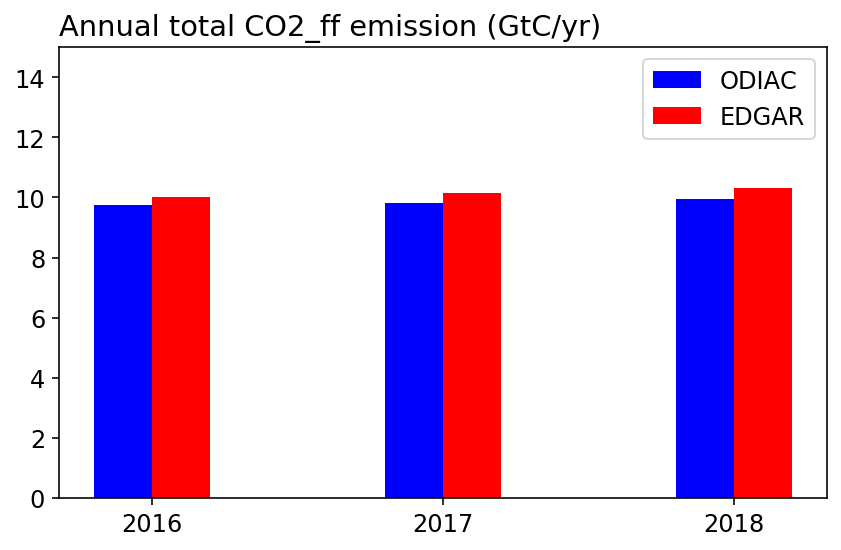

In [157]:
bar_pos = np.arange(len(year_vec)) + 1 # position of the bars

fig = plt.figure(figsize=[6, 4])
width = 0.2

bars_ODIAC = plt.bar(bar_pos-0.1, output_odiac, width=width, color = 'b', label='ODIAC')
bars_EDGAR = plt.bar(bar_pos+0.1, output_edgar, width=width, color = 'r', label='EDGAR')

plt.xticks(bar_pos, year_vec)
plt.ylim(top = 15)
plt.title('Annual total CO2_ff emission (GtC/yr)', loc='left')
plt.legend()

fig.tight_layout()

#fig.savefig('../plots/EDGAR_TNO_ODIAC_countries.png', dpi=300)

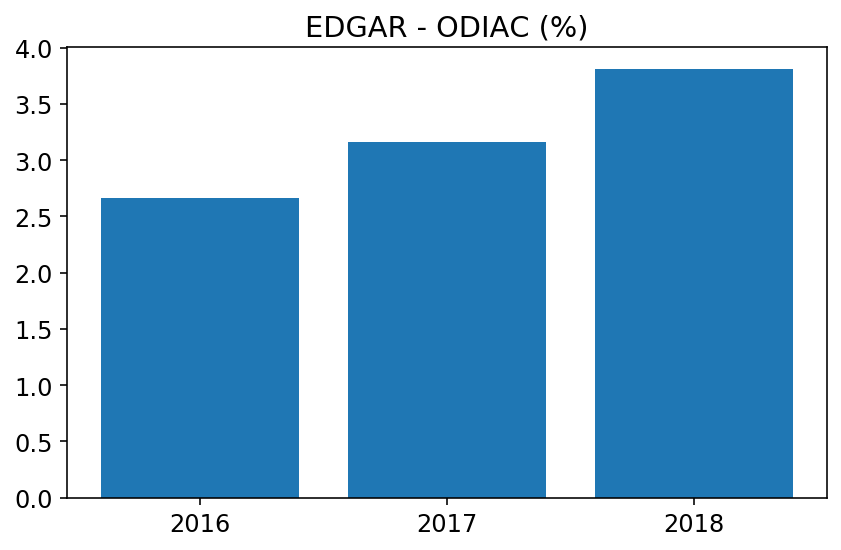

In [158]:
fig = plt.figure(figsize=[6, 4])
x = range(3)

plt.bar(x, 100*(output_edgar-output_odiac)/output_odiac, label = 'EDGAR-ODIAC')
plt.xticks(x, year_vec)

plt.title('EDGAR - ODIAC (%)')

fig.tight_layout()